In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\Downloads\kc_house_data.csv",encoding='latin1')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df = df.drop(columns=["id", "date", "zipcode"])

In [6]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(5)

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_sample = df.sample(n=5000, random_state=42) 

In [11]:
df_sample.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
9399,879000.0,4,3.00,3590,89640,2.0,0,0,3,10,3590,0,2005,0,47.7557,-122.036,2790,54014
18667,526500.0,3,1.50,1310,7236,1.0,0,0,4,7,1170,140,1928,0,47.6944,-122.333,1680,8431
9996,262000.0,3,1.50,1700,9579,1.0,0,0,4,7,1100,600,1962,0,47.3209,-122.338,1700,9628
10973,595000.0,2,1.75,1280,8500,1.0,0,0,3,7,1280,0,1953,2010,47.6553,-122.190,1950,10356
3043,430000.0,2,1.00,990,4920,1.0,0,0,3,6,990,0,1931,0,47.6939,-122.368,990,4960


In [12]:
df_sample.shape

(5000, 18)

In [13]:
df_sample['waterfront'].unique()

array([0, 1])

In [14]:
df_sample['view'].unique()

array([0, 3, 1, 4, 2])

In [15]:
df_sample['condition'].unique()

array([3, 4, 5, 2, 1])

In [16]:
df_sample['grade'].unique()

array([10,  7,  6,  8, 11,  9,  4, 12,  5, 13,  1])

In [17]:
df_sample.skew()

price             4.214874
bedrooms          0.447811
bathrooms         0.564520
sqft_living       1.428388
sqft_lot         15.479470
floors            0.585841
waterfront       11.343007
view              3.236136
condition         1.045267
grade             0.736988
sqft_above        1.437948
sqft_basement     1.491230
yr_built         -0.477491
yr_renovated      4.764384
lat              -0.483304
long              0.876393
sqft_living15     1.130497
sqft_lot15        7.885139
dtype: float64

In [18]:
import numpy as np
import pandas as pd

df_before = df_sample.copy()
df_after = df_sample.copy()

log_cols = ['price','sqft_living','sqft_lot','sqft_above',
            'sqft_living15','sqft_lot15']

for col in log_cols:
    df_after[col] = np.log1p(df_after[col])

skew_before = df_before[log_cols].skew()
skew_after = df_after[log_cols].skew()

skew_comparison = pd.DataFrame({
    'Before_Log': skew_before,
    'After_Log': skew_after
})

print("Skewness comparison before vs after log transformation")
print(skew_comparison)


Skewness comparison before vs after log transformation
               Before_Log  After_Log
price            4.214874   0.449072
sqft_living      1.428388  -0.049288
sqft_lot        15.479470   1.012423
sqft_above       1.437948   0.221982
sqft_living15    1.130497   0.206178
sqft_lot15       7.885139   0.980511


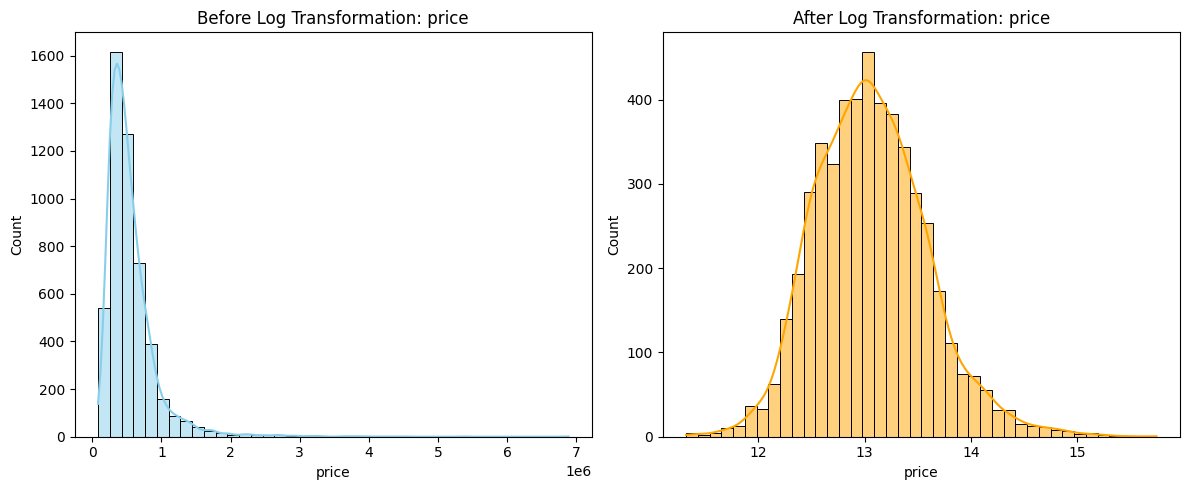

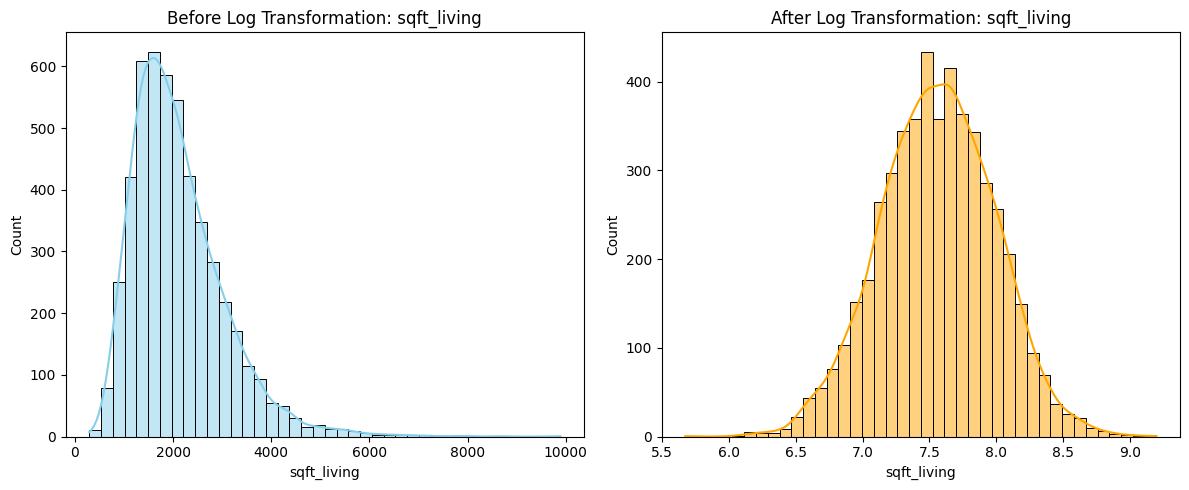

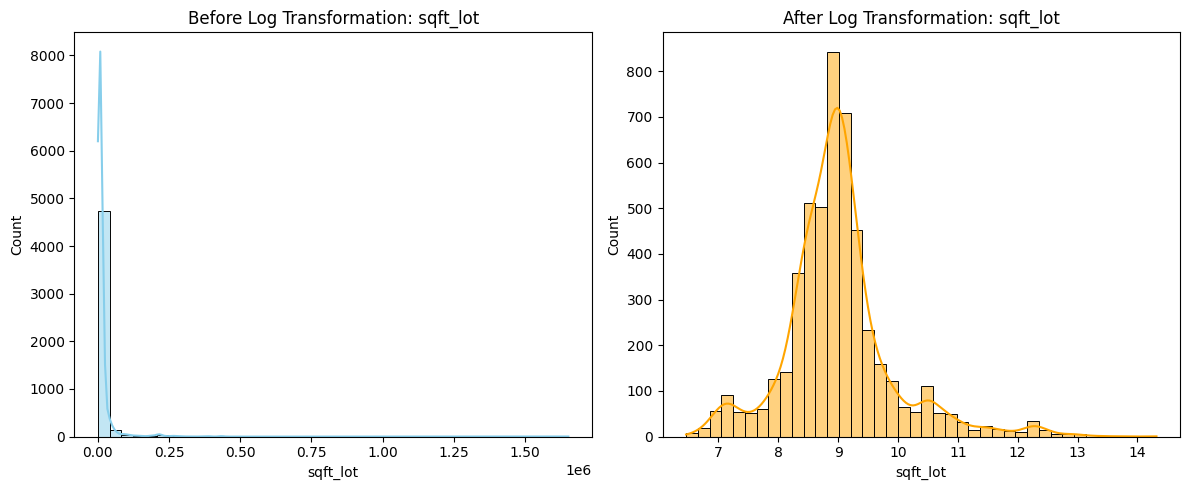

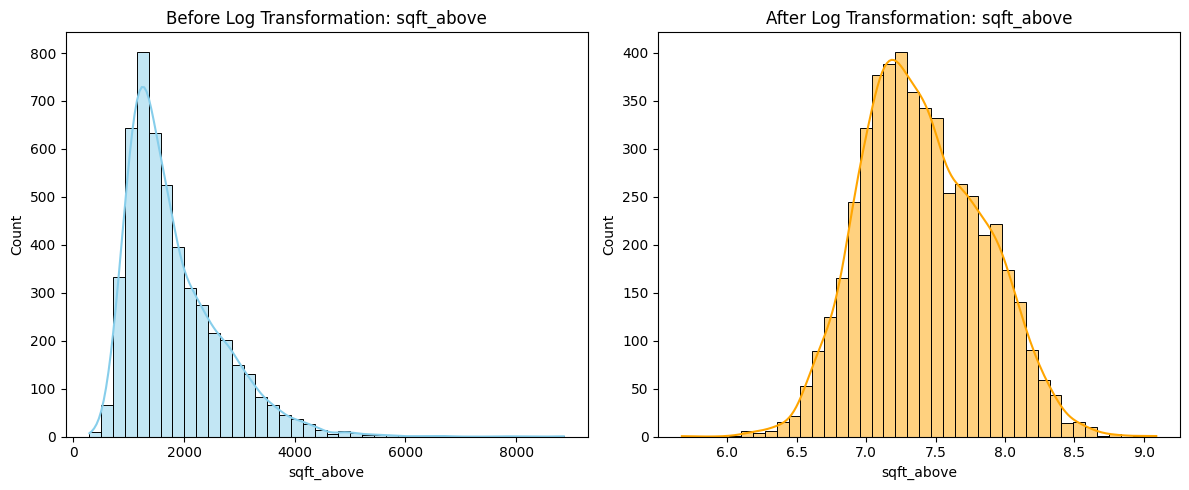

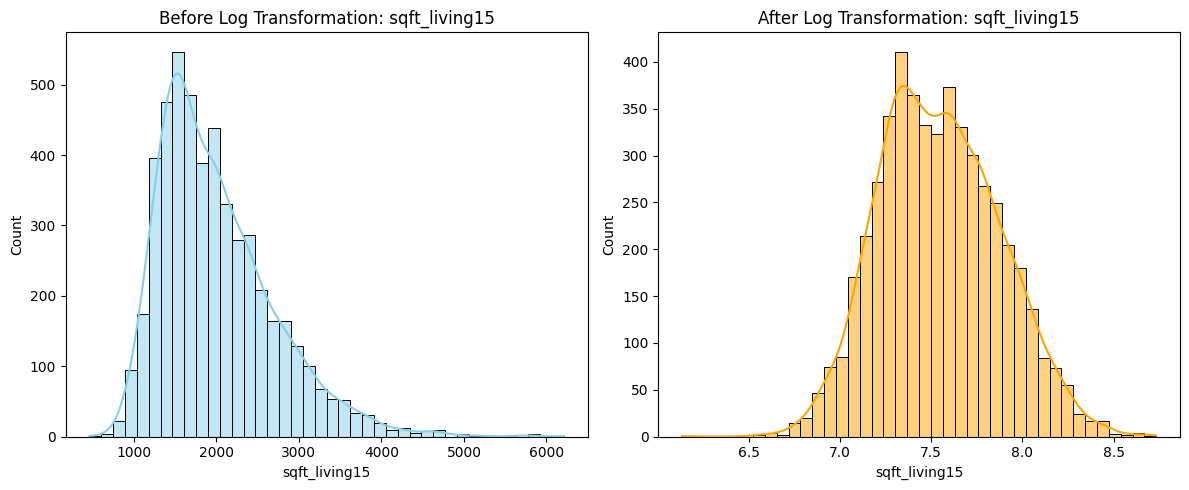

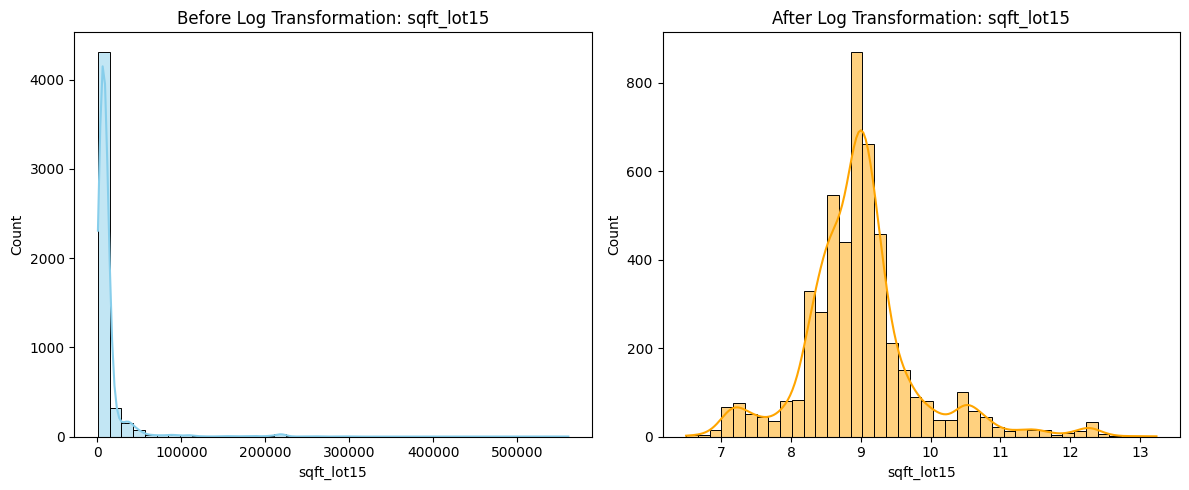

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in log_cols:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df_before[col], bins=40, kde=True, color="skyblue")
    plt.title(f"Before Log Transformation: {col}")
    
    plt.subplot(1,2,2)
    sns.histplot(df_after[col], bins=40, kde=True, color="orange")
    plt.title(f"After Log Transformation: {col}")
    
    plt.tight_layout()
    plt.show()


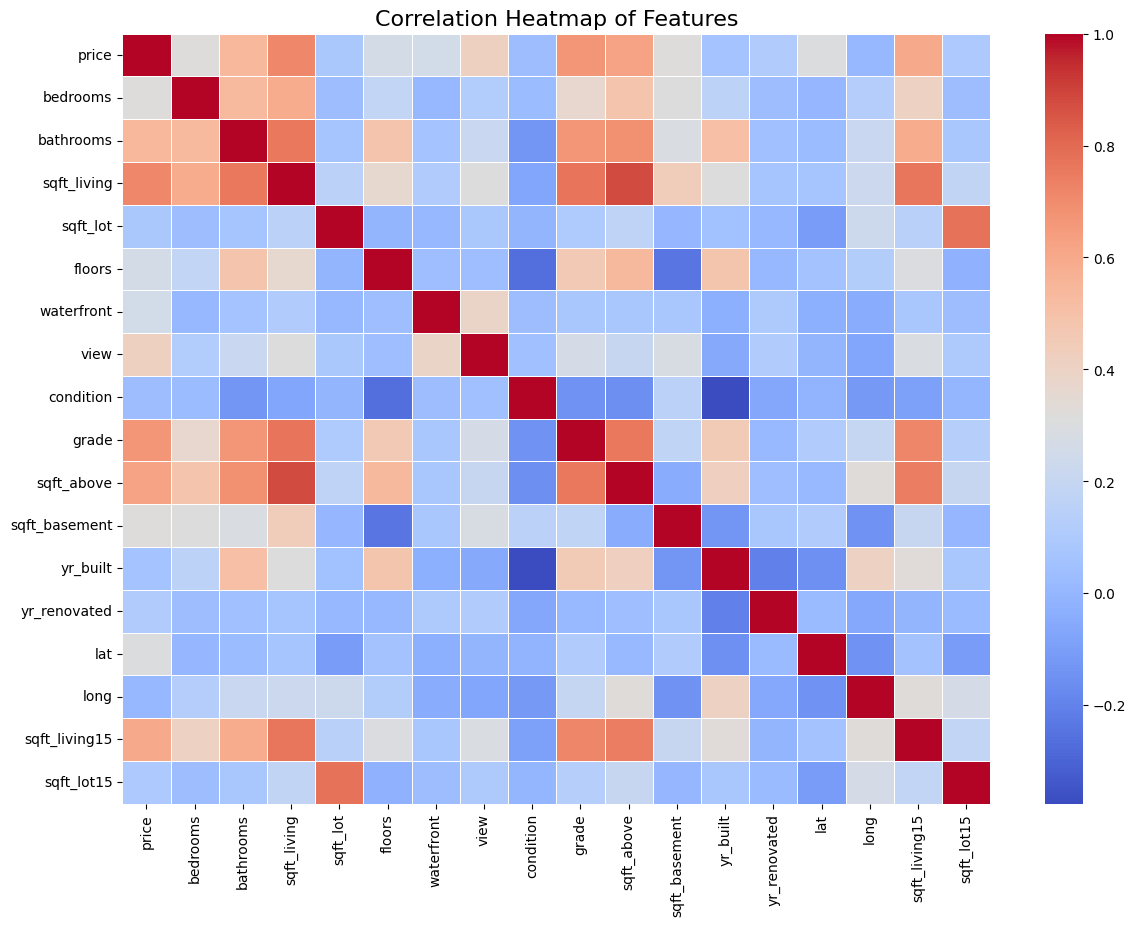

In [20]:
plt.figure(figsize=(14,10))
corr = df_sample.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

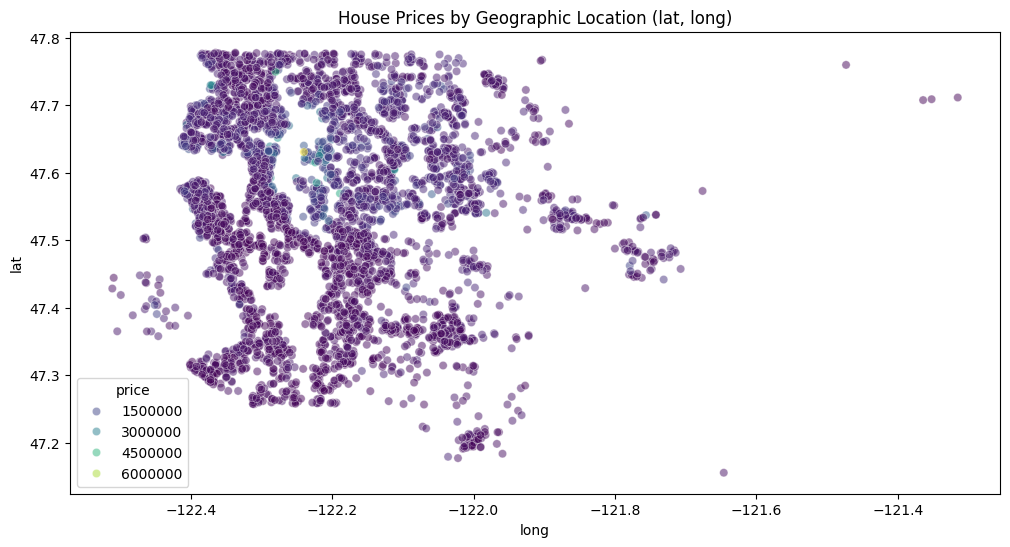

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long', y='lat', hue='price', data=df_sample,
                palette="viridis", alpha=0.5)
plt.title("House Prices by Geographic Location (lat, long)")
plt.show()

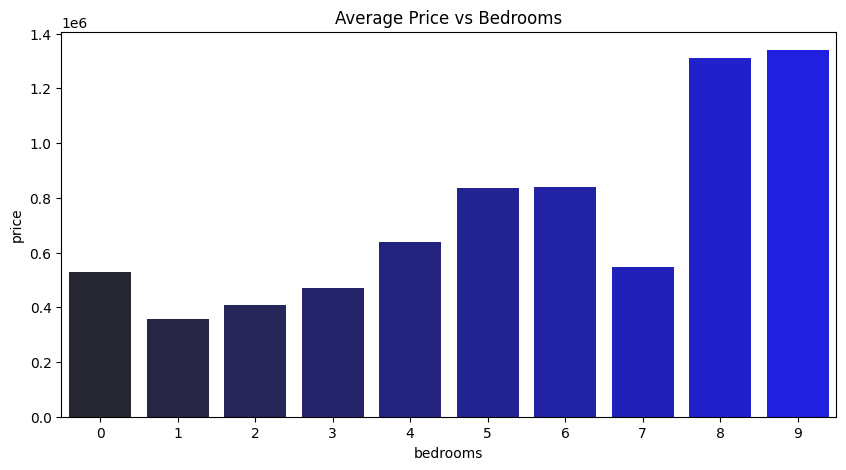

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='bedrooms', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='bedrooms', legend=False,palette="dark:blue")
plt.title("Average Price vs Bedrooms")
plt.show()

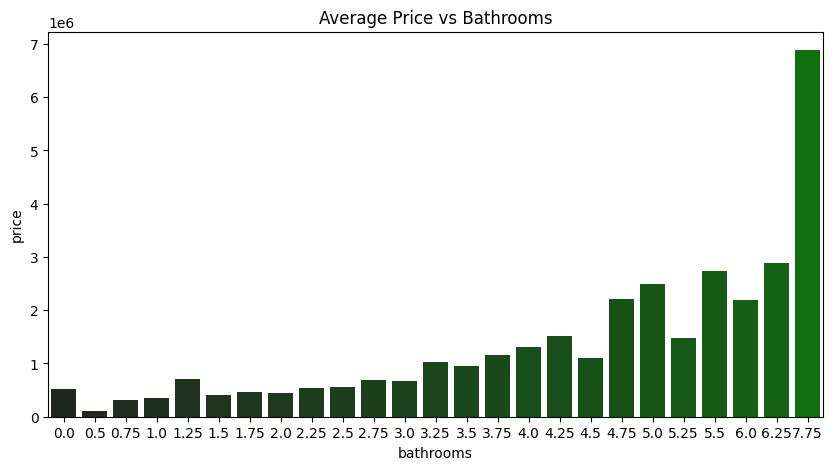

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='bathrooms', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='bathrooms', legend=False,palette="dark:Green")
plt.title("Average Price vs Bathrooms")
plt.show()

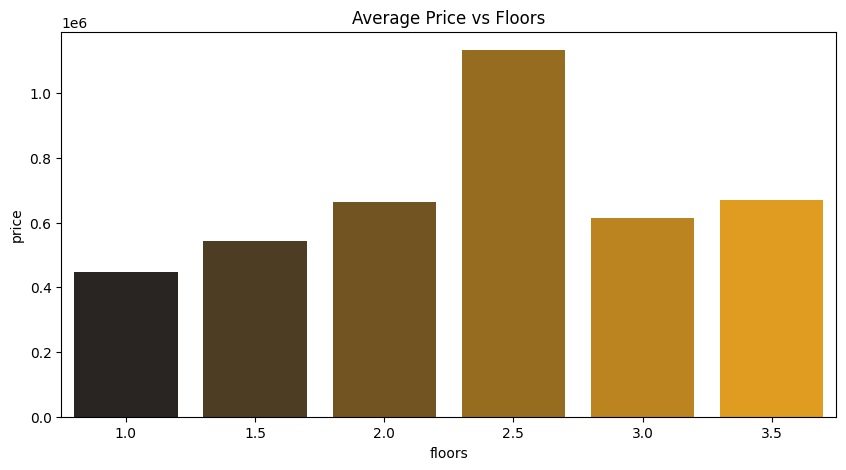

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='floors', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='floors', legend=False,palette="dark:Orange")
plt.title("Average Price vs Floors")
plt.show()

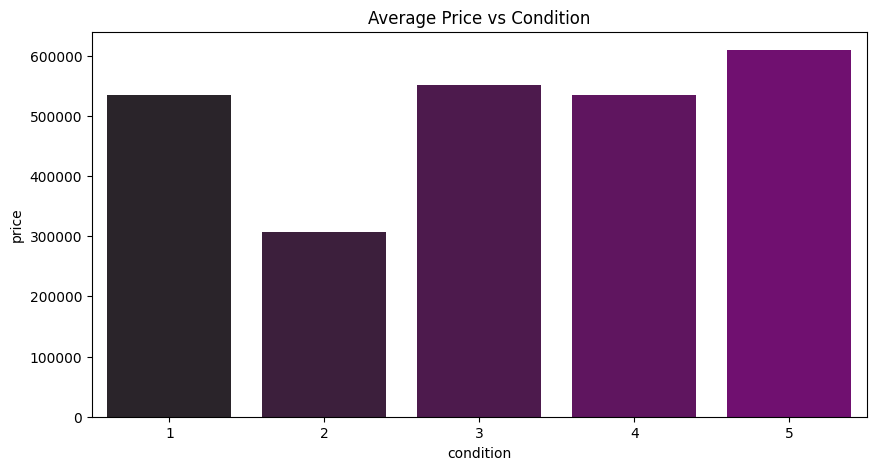

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='condition', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='condition', legend=False,palette="dark:purple")
plt.title("Average Price vs Condition")
plt.show()

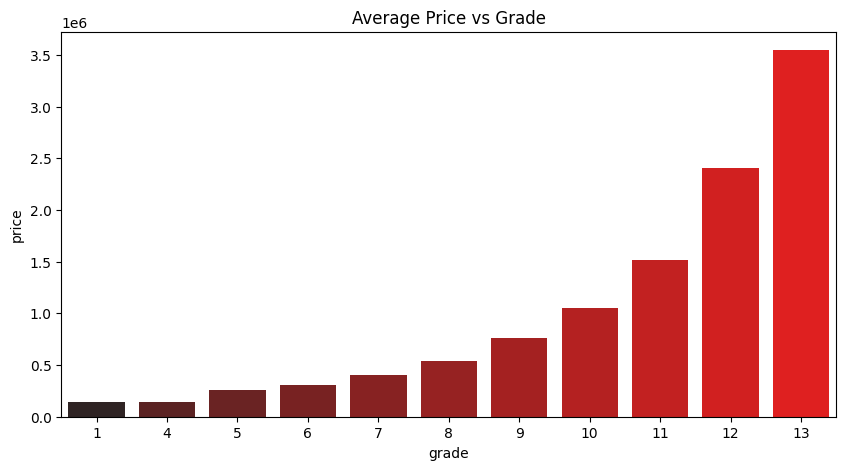

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='grade', legend=False, palette="dark:red")
plt.title("Average Price vs Grade")
plt.show()

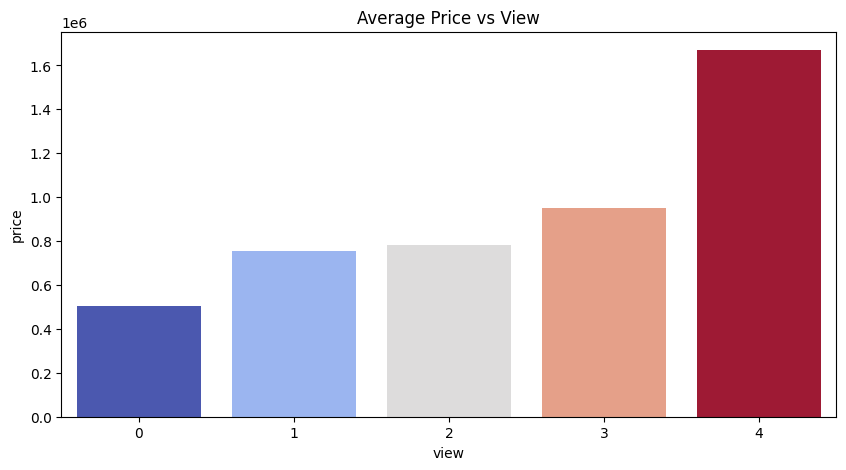

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='view', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='view', legend=False, palette="coolwarm")
plt.title("Average Price vs View")
plt.show()

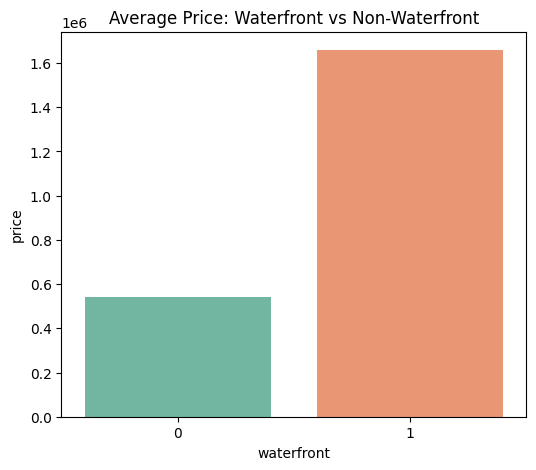

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(x='waterfront', y='price', data=df_sample, estimator=np.mean,
            errorbar=None, hue='waterfront', legend=False, palette="Set2")
plt.title("Average Price: Waterfront vs Non-Waterfront")
plt.show()

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
X = df.drop("price", axis=1) 
y = df["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": make_pipeline(
        StandardScaler(),
        Ridge(alpha=1.0, max_iter=10000, random_state=42)
    ),
    "Lasso Regression": make_pipeline(
        StandardScaler(),
        Lasso(alpha=0.1, max_iter=20000, random_state=42)   
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=5, min_samples_split=10, random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42
    ),
    "AdaBoost": AdaBoostRegressor(
        n_estimators=100, learning_rate=0.05, random_state=42
    ),
    "KNN Regressor": make_pipeline(
        StandardScaler(),
        KNeighborsRegressor(n_neighbors=5)
    ),
    "XGBoost": XGBRegressor(
        n_estimators=100, max_depth=3, learning_rate=0.05,
        objective="reg:squarederror", random_state=42
    )
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")
    cv_rmse = np.sqrt(
        -cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_squared_error")
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    test_r2 = r2_score(y_test, preds)
    test_rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"{name}:")
    print(f"  CV R²={cv_r2.mean():.4f} ± {cv_r2.std():.4f}, CV RMSE={cv_rmse.mean():.4f}")
    print(f"  Test R²={test_r2:.4f}, Test RMSE={test_rmse:.4f}\n")


  


Linear Regression:
  CV R²=0.6912 ± 0.0064, CV RMSE=202150.5583
  Test R²=0.6992, Test RMSE=206944.7829

Ridge Regression:
  CV R²=0.6912 ± 0.0064, CV RMSE=202150.2423
  Test R²=0.6992, Test RMSE=206944.6323

Lasso Regression:
  CV R²=0.6912 ± 0.0064, CV RMSE=202150.5557
  Test R²=0.6992, Test RMSE=206944.8101

Random Forest:
  CV R²=0.7626 ± 0.0100, CV RMSE=177196.3642
  Test R²=0.7600, Test RMSE=184848.0837

Gradient Boosting:
  CV R²=0.8321 ± 0.0117, CV RMSE=148883.5133
  Test R²=0.8416, Test RMSE=150146.4586

AdaBoost:
  CV R²=0.6643 ± 0.0339, CV RMSE=209962.6373
  Test R²=0.6842, Test RMSE=212019.9755

KNN Regressor:
  CV R²=0.7791 ± 0.0139, CV RMSE=171034.7460
  Test R²=0.7815, Test RMSE=176377.3585

XGBoost:
  CV R²=0.8293 ± 0.0161, CV RMSE=150318.8118
  Test R²=0.8372, Test RMSE=152255.2070



In [30]:
import numpy as np

results = {}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

for name, model in models.items():
    cv_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")
    results[name] = np.mean(cv_r2)

sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("Best two models:")
for model_name, score in sorted_models[:2]:
    print(f"{model_name}: R2 score = {score:.4f}")


Best two models:
Gradient Boosting: R2 score = 0.8282
XGBoost: R2 score = 0.8267


In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost R2 Score:", xgb_grid.best_score_)


Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best XGBoost R2 Score: 0.8859411690211827


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

gbr_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gbr = GradientBoostingRegressor(random_state=42)

gbr_grid = GridSearchCV(
    estimator=gbr,
    param_grid=gbr_param_grid,
    cv=2,
    scoring='r2',
    n_jobs=-1
)

gbr_grid.fit(X_train, y_train)

print("Best Gradient Boosting Params:", gbr_grid.best_params_)
print("Best Gradient Boosting R2 Score:", gbr_grid.best_score_)


Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Gradient Boosting R2 Score: 0.8653666676176108
